<a href="https://colab.research.google.com/github/jtndr26/Zomato/blob/main/Zomato_Restuarant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zomato_Restuarant_Clustering and Sentiment_Analysis

## Business Context:

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder
Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of
restaurants, and also has food delivery options from partner restaurants in select cities. India is
quite famous for its diverse multi cuisine available in a large number of restaurants and hotel
resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving.
More Indians are warming up to the idea of eating restaurant food whether by dining outside or
getting food delivered. The growing number of restaurants in every state of India has been a
motivation to inspect the data to get some insights, interesting facts and figures about the Indian
food industry in each city. So, this project focuses on analysing the Zomato restaurant data for
each city in India.

## Project Description:
The Project focuses on Customers and Company, you have to analyze the sentiments of the
reviews given by the customer in the data and make some useful conclusions in the form of
Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized
as it becomes easy to analyse data at instant. The Analysis also solves some of the business cases
that can directly help the customers finding the Best restaurant in their locality and for the
company to grow up and work on the fields they are currently lagging in. This could help in
clustering the restaurants into segments. Also the data has valuable information around cuisine
and costing which can be used in cost vs. benefit analysis Data could be used for sentiment
analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.


Data Decription: 

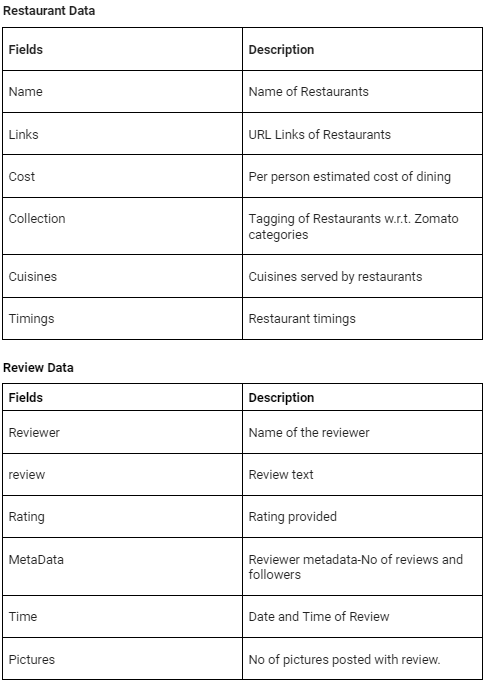

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np,pandas as pd 
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing and Understanding the Data

In [4]:
path = '/content/drive/My Drive/Colab Notebooks/Unsupervised Learning/Capstone IV/'
df1 = pd.read_csv(path+'Zomato Restaurant names and Metadata.csv')
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [6]:
df1.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
df2 = pd.read_csv(path + 'Zomato Restaurant reviews.csv')
df2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


## For Clustering purpose we're using the dataset df1 and for the sentiment analysis task we'll be using dataset df2. Both these tasks will be executed sepeartely and whtaever analysis part involved will also be done independently. 

## Clustering Analysis:

### Data Understanding and Cleaning:

In [7]:
df1.isnull().sum()/len(df1)*100

Name            0.000000
Links           0.000000
Cost            0.000000
Collections    51.428571
Cuisines        0.000000
Timings         0.952381
dtype: float64

In [8]:
df1['Collections'].nunique()

42

In [9]:
df1[df1['Collections'].isnull()]

,Name,Links,Cost,Collections,Cuisines,Timings
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
15,KFC,https://www.zomato.com/hyderabad/kfc-gachibowli,500,NaN,"Burger, Fast Food",11 AM to 11 PM
16,NorFest - The Dhaba,https://www.zomato.com/hyderabad/norfest-the-d...,550,NaN,North Indian,12 Noon to 10:30 PM
17,Hotel Zara Hi-Fi,https://www.zomato.com/hyderabad/hotel-zara-ga...,400,NaN,"Chinese, North Indian",11:30 AM to 1 AM
23,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,NaN,"Ice Cream, Desserts",10 AM to 5 AM
25,Tiki Shack,https://www.zomato.com/hyderabad/tiki-shack-ga...,"1,000",NaN,Continental,"12Noon to 11PM (Mon-Thu),12Noon to 11:30PM (Fr..."
28,Behrouz Biryani,https://www.zomato.com/hyderabad/behrouz-birya...,600,NaN,"Mughlai, Biryani",10 AM to 1 AM
29,Hunger Maggi Point,https://www.zomato.com/hyderabad/hunger-maggi-...,200,NaN,Fast Food,4:30 PM to 5:30 AM
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN
33,Club Rogue,https://www.zomato.com/hyderabad/club-rogue-ga...,900,NaN,"North Indian, Fast Food",11 AM to 12 Midnight


In [10]:
df1[df1['Timings'].isnull()]

,Name,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


**Since more than 50% of the data in column 'Collections' is we're dropping that whole variable and also the single missing value in type cannot be filled by any means, hence will also be dropped.** 

In [11]:
df1.drop('Collections',axis = 1,inplace = True)
df1.dropna(axis = 0,inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      104 non-null    object
 1   Links     104 non-null    object
 2   Cost      104 non-null    object
 3   Cuisines  104 non-null    object
 4   Timings   104 non-null    object
dtypes: object(5)
memory usage: 4.9+ KB


In [12]:
df1.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


The data type for the Cost variable is incorrect and needs to converted to interger data type.

In [13]:
df1['Cost'] = df1.Cost.apply(lambda x: int(x.replace(',','')))
df1.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [15]:
df1.describe()

,Cost
count,104.000000
mean,861.057692
std,512.605979
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


## Exploratory Data Analysis:

### Univariate Analysis:

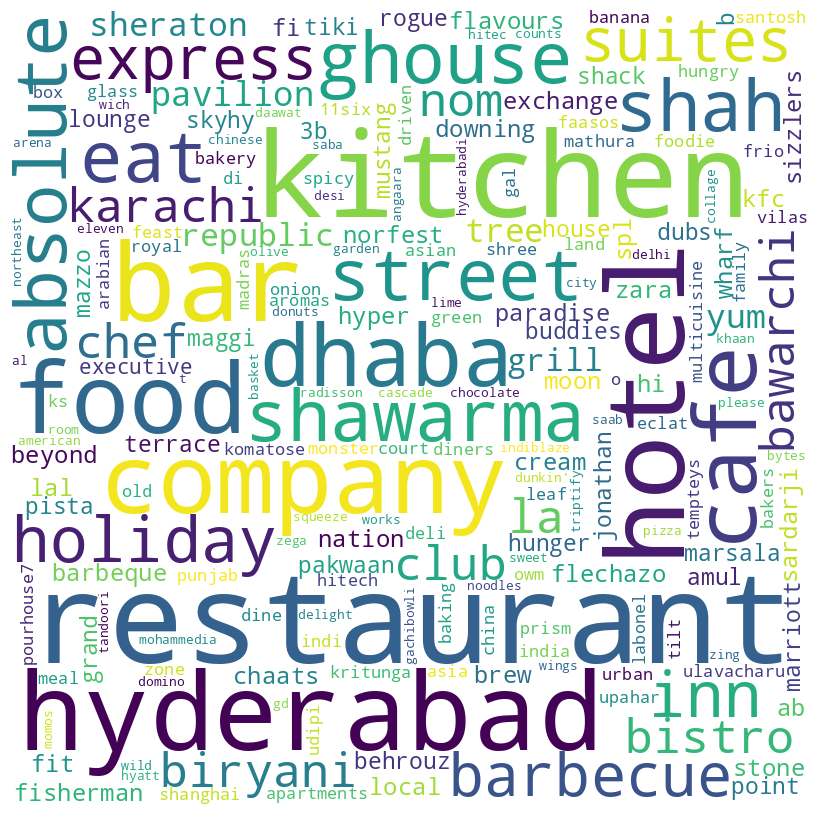

In [16]:
from wordcloud import WordCloud,STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df1.Name:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

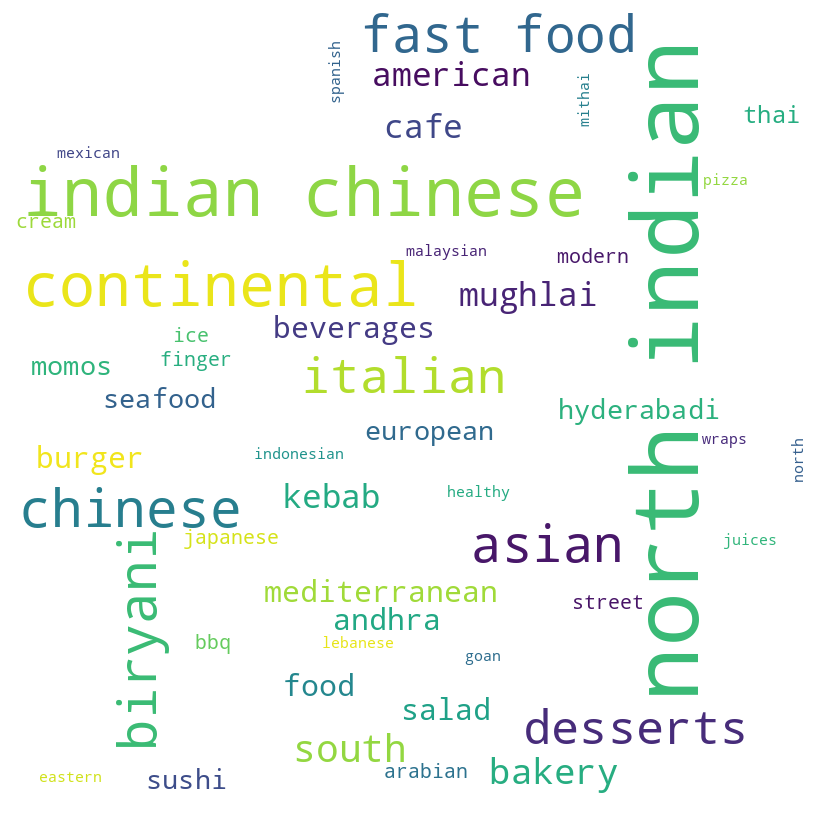

In [17]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df1.Cuisines:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

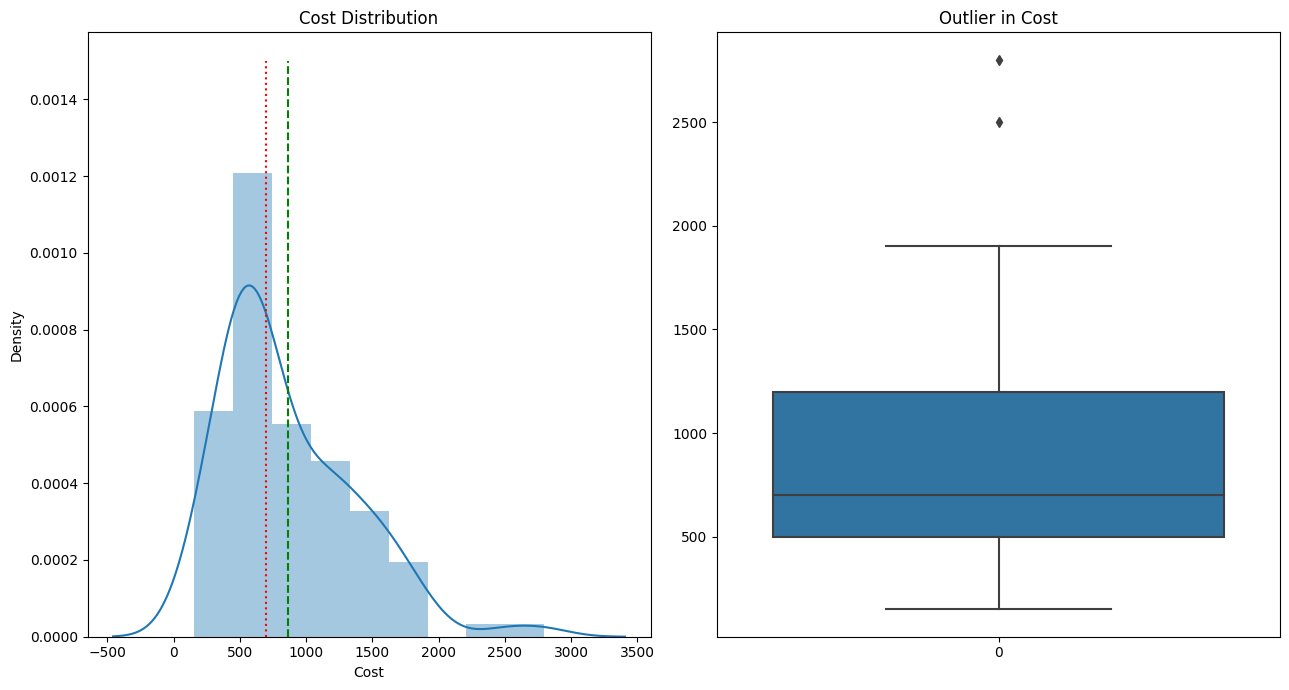

In [18]:
plt.figure(figsize = (13,7))
plt.subplot(1,2,1)
sns.distplot(df1.Cost)
plt.vlines(df1.Cost.mean(),0,0.0015,color = 'green',linestyles = 'dashed')
plt.vlines(df1.Cost.median(),0,0.0015,color = 'red',linestyles = 'dotted')
plt.title('Cost Distribution')
plt.subplot(1,2,2)
sns.boxplot(df1.Cost)
plt.title('Outlier in Cost')
plt.tight_layout()
plt.show()

In [19]:
print(df1.Cost.median())
print(df1.Cost.mean())
print(df1.Cost.mode())

700.0
861.0576923076923
0    500
Name: Cost, dtype: int64


In [20]:
df1[df1.Cost == df1.Cost.max()]

,Name,Links,Cost,Cuisines,Timings
92,Collage - Hyatt Hyderabad Gachibowli,https://www.zomato.com/hyderabad/collage-hyatt...,2800,"Continental, Italian, North Indian, Chinese, A...",24 Hours (Mon-Sun)


In [21]:
df1[df1.Cost == df1.Cost.min()]

,Name,Links,Cost,Cuisines,Timings
23,Amul,https://www.zomato.com/hyderabad/amul-gachibowli,150,"Ice Cream, Desserts",10 AM to 5 AM
89,Mohammedia Shawarma,https://www.zomato.com/hyderabad/mohammedia-sh...,150,"Street Food, Arabian",1 PM to 1 AM


### Bi-Variate Analysis

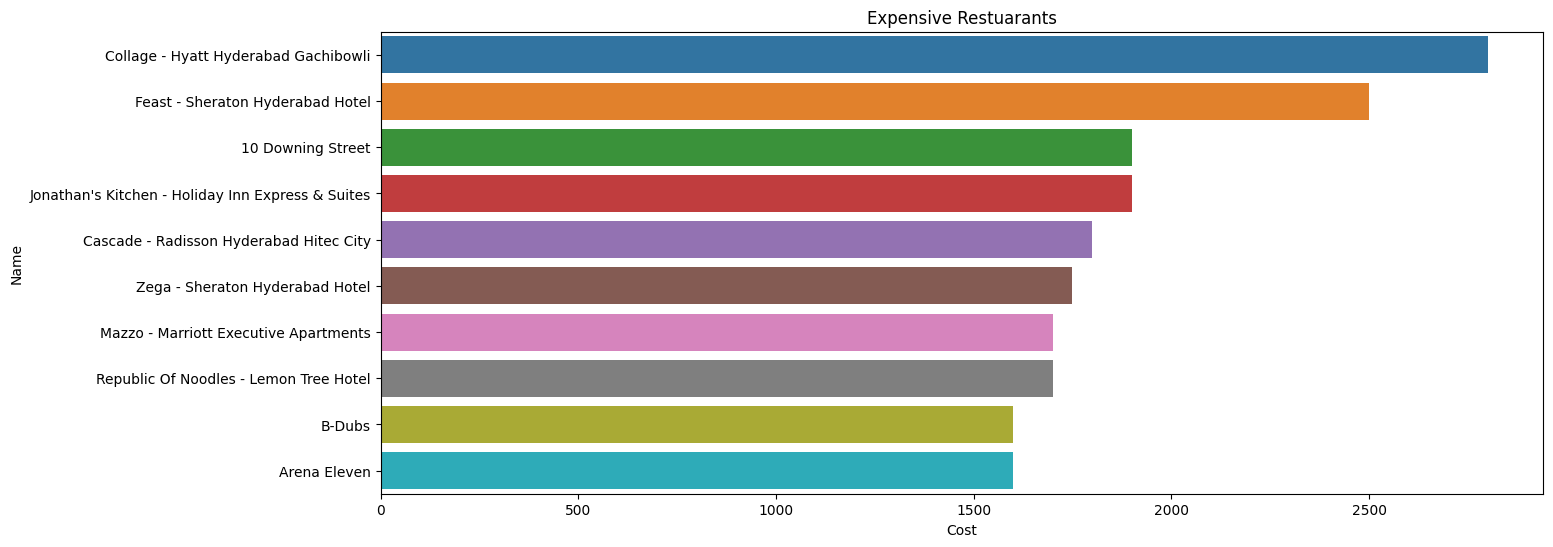

In [98]:
plt.figure(figsize = (15,6))
sns.barplot(y = df1.sort_values('Cost',ascending = False)['Name'][:10],x = df1.sort_values('Cost',ascending = False)['Cost'][:10])
plt.title('Expensive Restuarants')
plt.show()

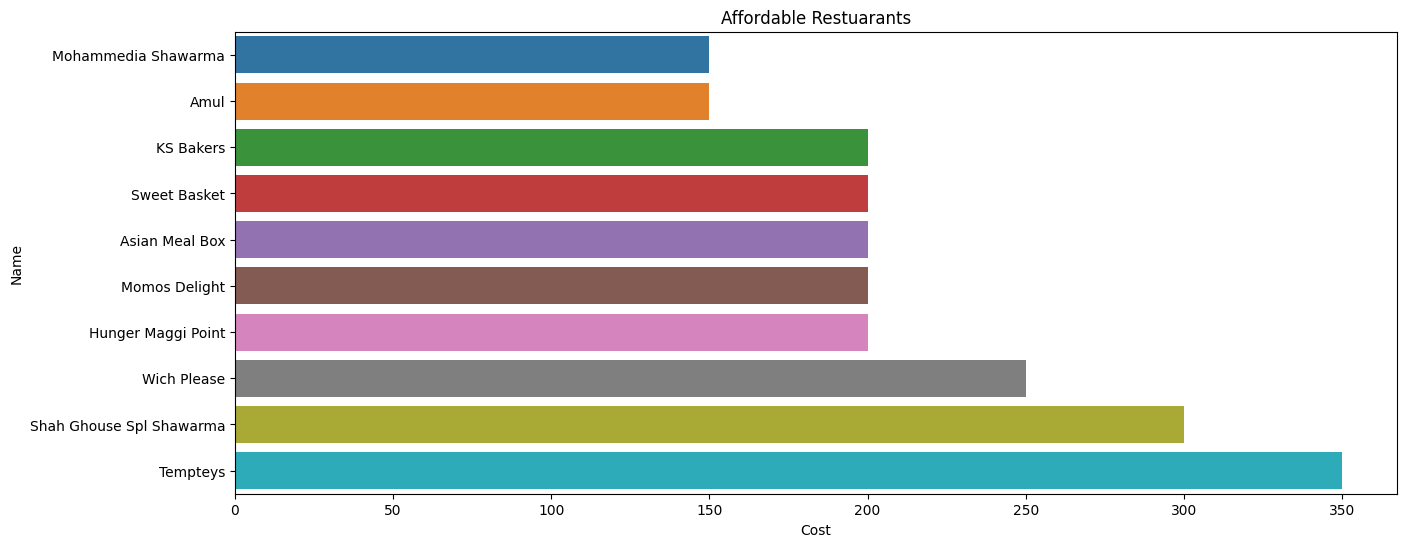

In [100]:
plt.figure(figsize = (15,6))
sns.barplot(y = df1.sort_values('Cost')['Name'][:10],x = df1.sort_values('Cost')['Cost'][:10])
plt.title('Affordable Restuarants')
plt.show()

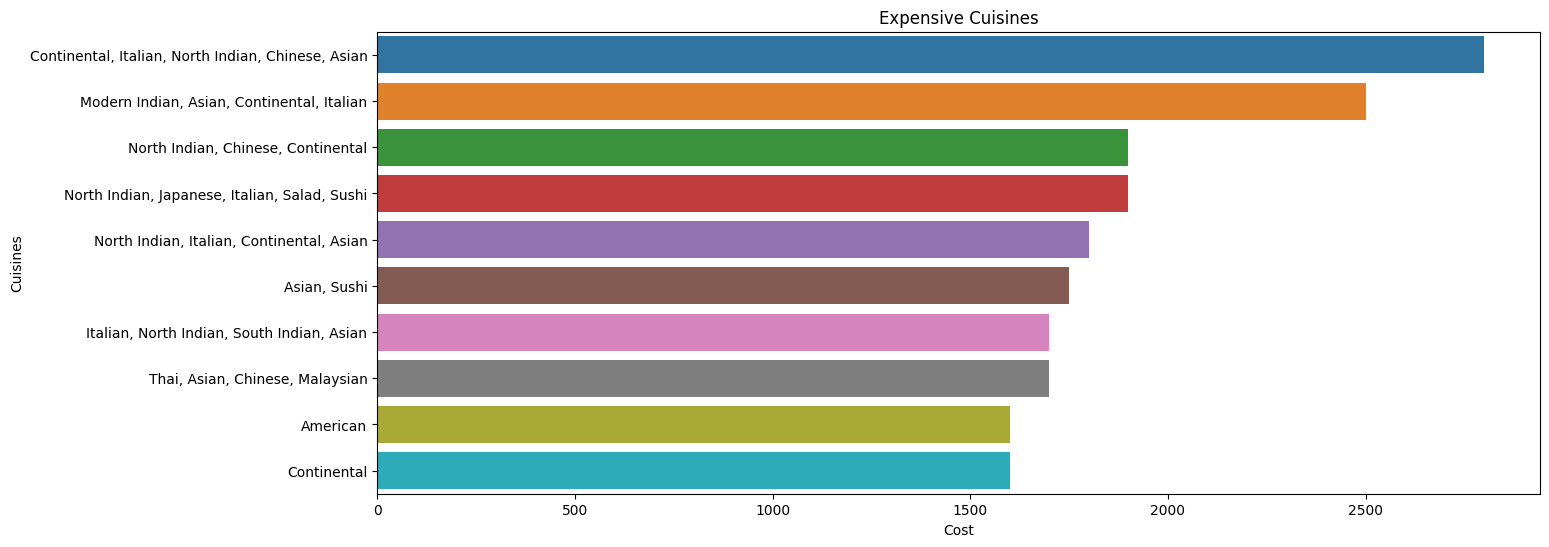

In [96]:
plt.figure(figsize = (15,6))
sns.barplot(y = df1.sort_values('Cost',ascending = False)['Cuisines'][:10],x = df1.sort_values('Cost',ascending = False)['Cost'][:10])
plt.title('Expensive Cuisines')
plt.show()

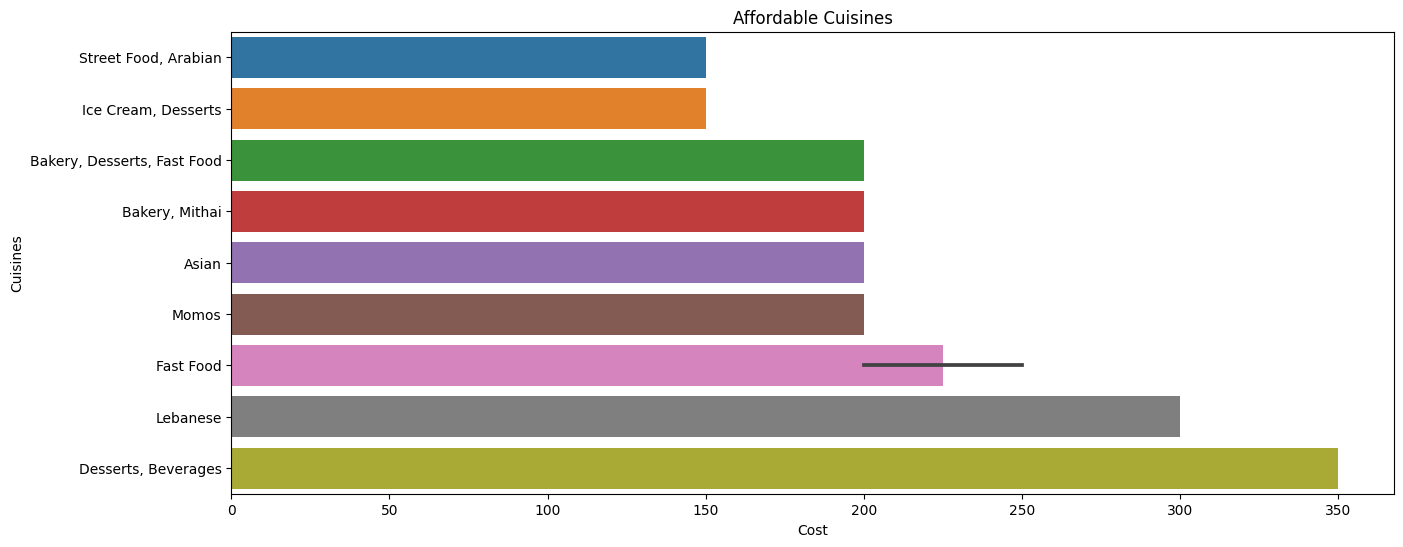

In [101]:
plt.figure(figsize = (15,6))
sns.barplot(y = df1.sort_values('Cost')['Cuisines'][:10],x = df1.sort_values('Cost')['Cost'][:10])
plt.title('Affordable Cuisines')
plt.show()

In [26]:
df1.drop(['Links','Timings'],axis = 1,inplace = True)
df1.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I..."
1,Paradise,800,"Biryani, North Indian, Chinese"
2,Flechazo,1300,"Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,1200,"Asian, Continental, North Indian, Chinese, Med..."


## Clustering Analysis

In [27]:
X = df1.values
X[:,1] = X[:,1].astype(float)
X[:5]

array([['Beyond Flavours', 800.0,
        'Chinese, Continental, Kebab, European, South Indian, North Indian'],
       ['Paradise', 800.0, 'Biryani, North Indian, Chinese'],
       ['Flechazo', 1300.0,
        'Asian, Mediterranean, North Indian, Desserts'],
       ['Shah Ghouse Hotel & Restaurant', 800.0,
        'Biryani, North Indian, Chinese, Seafood, Beverages'],
       ['Over The Moon Brew Company', 1200.0,
        'Asian, Continental, North Indian, Chinese, Mediterranean']],
      dtype=object)

In [28]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Best run was number 1
Best run was number 2
Best run was number 1
Best run was number 3
Best run was number 5


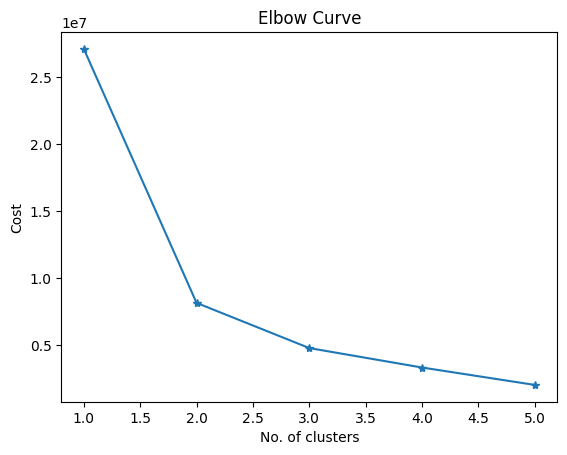

In [104]:
from kmodes.kprototypes import KPrototypes
cost = []
K = range(1,6)
for k in list(K):
  kproto = KPrototypes(n_clusters=k, verbose = 2,n_jobs = -1,init = 'random', random_state = 0, n_init = 5)
  kproto.fit_predict(X, categorical=[0, 2])
  cost.append(kproto.cost_)

plt.plot(K, cost, '*-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()

According to the scree plot of the cost function above, we consider choosing the number of cluster k = 3. It will be the optimal number of clusters for K-Prototype cluster analysis.

In [30]:
kproto = KPrototypes(n_clusters=3, verbose = 2,n_jobs = -1,init = 'random', random_state = 0, n_init = 5)
clusters = kproto.fit_predict(X, categorical=[0, 2])

Best run was number 1


In [31]:
print(kproto.cluster_centroids_)

[['1055.357142857143' 'Chinese Pavilion'
  'American, Chinese, North Indian, Kebab, South Indian']
 ['497.41379310344826' '13 Dhaba' 'North Indian, Chinese']
 ['1730.5555555555557' '10 Downing Street'
  'North Indian, Chinese, Continental']]


In [32]:
cluster_dict = []
for c in clusters:
  cluster_dict.append(c)

In [33]:
df1['Labels'] = cluster_dict 
df1.head()

,Name,Cost,Cuisines,Labels
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",0
1,Paradise,800,"Biryani, North Indian, Chinese",0
2,Flechazo,1300,"Asian, Mediterranean, North Indian, Desserts",0
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever...",0
4,Over The Moon Brew Company,1200,"Asian, Continental, North Indian, Chinese, Med...",0


In [34]:
df1.Labels.value_counts()

1    58
0    28
2    18
Name: Labels, dtype: int64

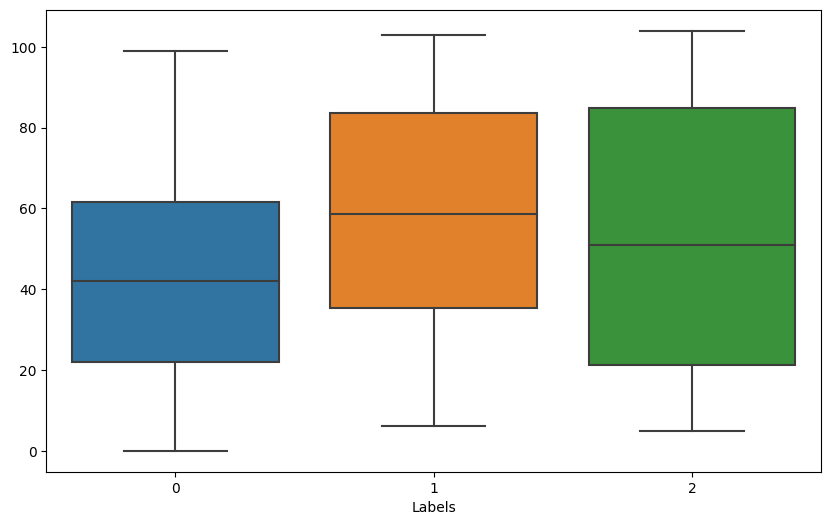

In [35]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df1,x = 'Labels',y = df1.index)
plt.show()

In [36]:
df1[df1['Labels'] == 0].head()

,Name,Cost,Cuisines,Labels
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...",0
1,Paradise,800,"Biryani, North Indian, Chinese",0
2,Flechazo,1300,"Asian, Mediterranean, North Indian, Desserts",0
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever...",0
4,Over The Moon Brew Company,1200,"Asian, Continental, North Indian, Chinese, Med...",0


In [37]:
df1[df1['Labels'] == 0]['Cost'].max()

1300

In [38]:
df1[df1['Labels'] == 1].head()

,Name,Cost,Cuisines,Labels
6,eat.fit,500,"Healthy Food, North Indian, Continental, South...",1
7,Shah Ghouse Spl Shawarma,300,Lebanese,1
9,Cream Stone,350,"Ice Cream, Desserts",1
10,Sardarji's Chaats & More,400,"Street Food, North Indian, Fast Food",1
12,Absolute Sizzlers,750,"Continental, American, Chinese",1


In [39]:
df1[df1['Labels'] == 1]['Cost'].max()

750

In [40]:
df1[df1['Labels'] == 2].head()

,Name,Cost,Cuisines,Labels
5,The Fisherman's Wharf,1500,"Seafood, Goan, North Indian, Continental, Asian",2
11,Barbeque Nation,1600,"Mediterranean, North Indian, Kebab, BBQ",2
14,AB's - Absolute Barbecues,1500,"European, Mediterranean, North Indian",2
18,10 Downing Street,1900,"North Indian, Chinese, Continental",2
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900,"North Indian, Japanese, Italian, Salad, Sushi",2


In [41]:
df1[df1['Labels'] == 2]['Cost'].max()

2800

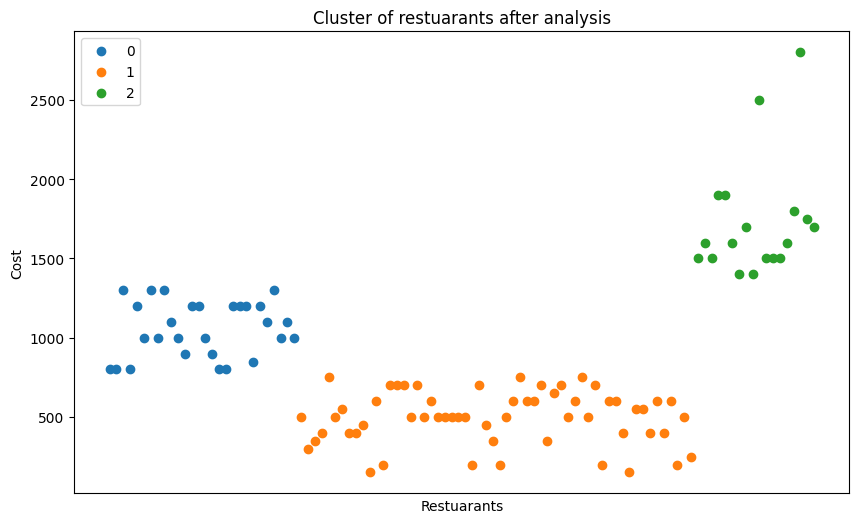

In [42]:
#Getting unique labels
u_labels = np.unique(cluster_dict)
 
#plotting the results:
plt.figure(figsize = (10,6))
for i in u_labels:
    plt.scatter(X[cluster_dict == i , 0] , X[cluster_dict == i , 1], label = i,cmap='flag')
plt.legend()
plt.xticks([])
plt.xlabel('Restuarants')
plt.ylabel('Cost')
plt.title('Cluster of restuarants after analysis')
plt.show()

## Sentiment Analysis

In [45]:
df2.isnull().sum()/len(df2)*100

Restaurant    0.00
Reviewer      0.38
Review        0.45
Rating        0.38
Metadata      0.38
Time          0.38
Pictures      0.00
dtype: float64

In [46]:
df2[df2['Review'].isnull()].head(10)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0
8228,Al Saba Restaurant,Suresh,NaN,5,1 Review,7/20/2018 22:42,0
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [47]:
df2.dropna(axis = 0,inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


In [48]:
df2['Rating'].value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [49]:
df2[df2.Rating == 'Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


In [50]:
df2 = df2[~(df2.Rating == 'Like')]
df2.reset_index(drop = True,inplace = True)
df2.shape

(9954, 7)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9954 entries, 0 to 9953
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9954 non-null   object
 1   Reviewer    9954 non-null   object
 2   Review      9954 non-null   object
 3   Rating      9954 non-null   object
 4   Metadata    9954 non-null   object
 5   Time        9954 non-null   object
 6   Pictures    9954 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 544.5+ KB


In [51]:
df2['Rating'] = df2['Rating'].astype(float)

In [52]:
for i in range(len(df2)):
  a = df2.loc[i,'Metadata'].split()
  if len(a) < 3:
    df2.loc[i,'No.of Reviews'] = int(a[0])
    df2.loc[i,'No.of Followers'] = 0
  else:
    df2.loc[i,'No.of Reviews'] = int(a[0])
    df2.loc[i,'No.of Followers'] = int(a[3])
df2.head(10)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,No.of Reviews,No.of Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3.0,2.0
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5.0,1 Review,5/24/2019 15:22,0,1.0,0.0
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5.0,1 Review,5/24/2019 1:02,0,1.0,0.0
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4.0,1 Review,5/23/2019 15:01,0,1.0,0.0
8,Beyond Flavours,Akash Thorat,"Excellent food , specially if you like spicy f...",5.0,"1 Review , 1 Follower",5/22/2019 23:12,0,1.0,1.0
9,Beyond Flavours,Smarak Patnaik,Came for the birthday treat of a close friend....,5.0,"1 Review , 1 Follower",5/22/2019 22:37,0,1.0,1.0


In [53]:
df2.loc[25:35,:]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,No.of Reviews,No.of Followers
25,Beyond Flavours,Imteja7,The place is very good.. 5* to the live music....,5.0,3 Reviews,5/20/2019 14:17,0,3.0,0.0
26,Beyond Flavours,Nisha Gahlawat,Sonalin has a great voice.. 😍 must visit the p...,5.0,"2 Reviews , 1 Follower",5/20/2019 12:45,0,2.0,1.0
27,Beyond Flavours,Dharini Hombal,I heard her voice..she is too beautiful with a...,5.0,"1 Review , 26 Followers",5/20/2019 12:30,0,1.0,26.0
28,Beyond Flavours,Ankita Sinha,Sonalin is a very good singer in the city.. be...,5.0,"9 Reviews , 5 Followers",5/20/2019 12:25,0,9.0,5.0
29,Beyond Flavours,Ppck2412,Food is descent enough. Desert options were al...,4.0,"3 Reviews , 3 Followers",5/20/2019 12:11,0,3.0,3.0
30,Beyond Flavours,Pragya Sarda,"Short review: Decent breads and starters, bad ...",3.0,"9 Reviews , 8 Followers",5/20/2019 0:35,0,9.0,8.0
31,Beyond Flavours,Anindya,Excellent food and very good service by soumen...,5.0,"1 Review , 1 Follower",5/19/2019 22:57,0,1.0,1.0
32,Beyond Flavours,Santhosh Reddyy,My review for this place would be 5star for th...,5.0,"3 Reviews , 1 Follower",5/19/2019 22:46,0,3.0,1.0
33,Beyond Flavours,Piyali Mahapatra,It was a very nice experience. Food was amazin...,5.0,"3 Reviews , 190 Followers",5/19/2019 22:32,0,3.0,190.0
34,Beyond Flavours,Mehak Malhotra,"Had dinner with my friends. Menu is perfect, s...",5.0,"6 Reviews , 10 Followers",5/19/2019 22:29,0,6.0,10.0


In [54]:
df2.drop('Metadata',axis = 1,inplace = True)
df2['Time'] = pd.to_datetime(df2['Time'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9954 entries, 0 to 9953
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Restaurant       9954 non-null   object        
 1   Reviewer         9954 non-null   object        
 2   Review           9954 non-null   object        
 3   Rating           9954 non-null   float64       
 4   Time             9954 non-null   datetime64[ns]
 5   Pictures         9954 non-null   int64         
 6   No.of Reviews    9954 non-null   float64       
 7   No.of Followers  9954 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 622.2+ KB


In [55]:
df2.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No.of Reviews,No.of Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3.0,2.0


In [56]:
df2.describe()

,Rating,Pictures,No.of Reviews,No.of Followers
count,9954.000000,9954.000000,9954.000000,9954.000000
mean,3.600261,0.751959,24.007937,163.122363
std,1.483573,2.575819,50.631674,620.182806
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,1.000000,1.000000
50%,4.000000,0.000000,4.000000,7.000000
75%,5.000000,0.000000,22.000000,63.000000
max,5.000000,64.000000,1031.000000,13410.000000


### Exploratory Data Analysis

In [57]:
res = df2.groupby('Restaurant')['Rating','No.of Reviews'].mean()
res = pd.DataFrame(res).reset_index()
res.head()

,Restaurant,Rating,No.of Reviews
0,10 Downing Street,3.80,39.90
1,13 Dhaba,3.48,17.70
2,"3B's - Buddies, Bar & Barbecue",4.76,3.70
3,AB's - Absolute Barbecues,4.88,2.71
4,Absolute Sizzlers,3.62,11.67


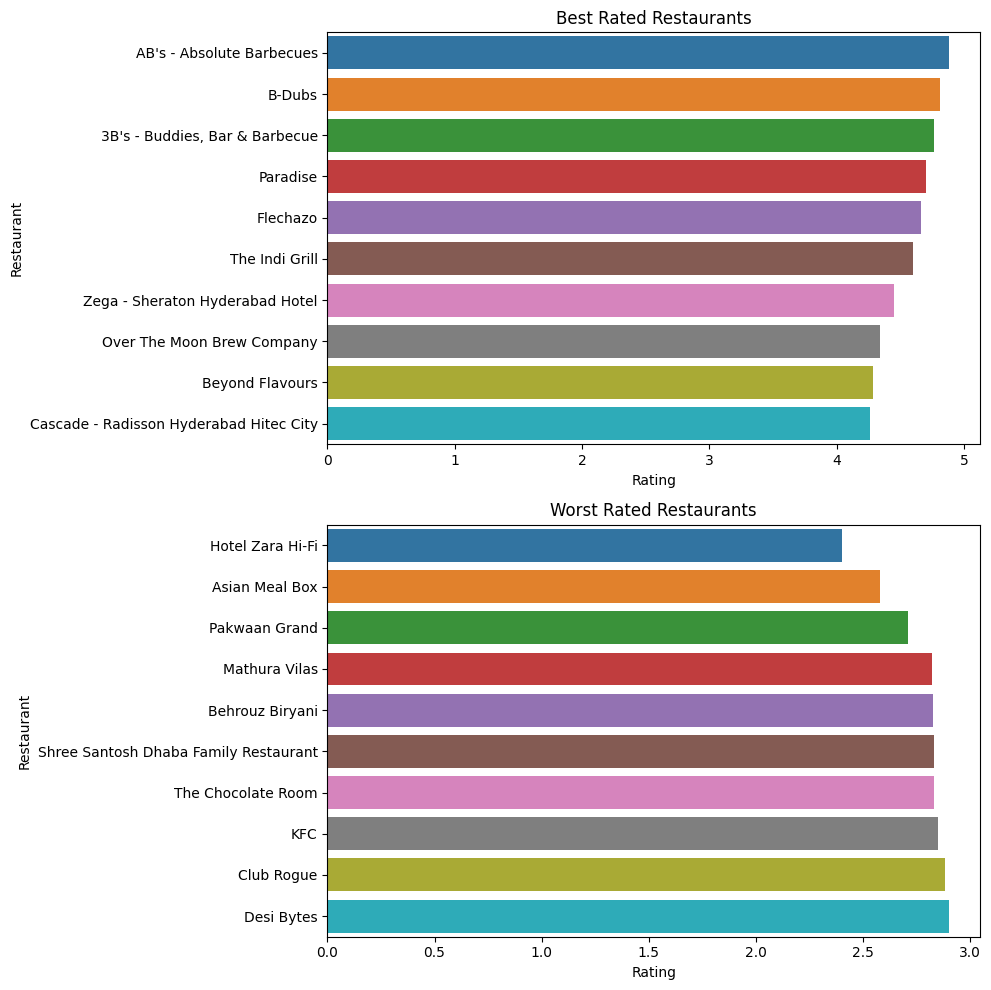

In [58]:
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
sns.barplot(data = res.sort_values('Rating',ascending = False)[:10],x = 'Rating',y = 'Restaurant')
plt.title('Best Rated Restaurants')
plt.subplot(2,1,2)
sns.barplot(data = res.sort_values('Rating',ascending = True)[:10],x = 'Rating',y = 'Restaurant')
plt.title('Worst Rated Restaurants')
plt.tight_layout()
plt.show()

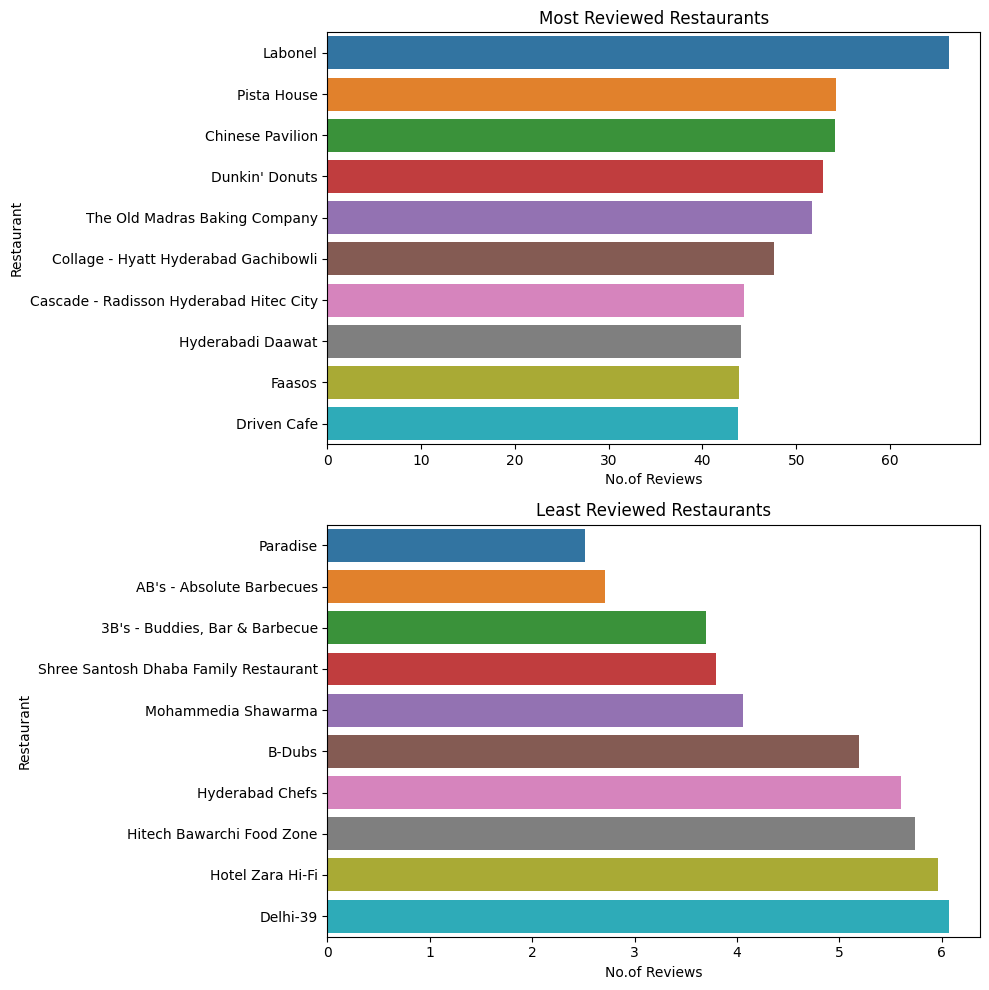

In [59]:
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
sns.barplot(data = res.sort_values('No.of Reviews',ascending = False)[:10],x = 'No.of Reviews',y = 'Restaurant')
plt.title('Most Reviewed Restaurants')
plt.subplot(2,1,2)
sns.barplot(data = res.sort_values('No.of Reviews',ascending = True)[:10],x = 'No.of Reviews',y = 'Restaurant')
plt.title('Least Reviewed Restaurants')
plt.tight_layout()
plt.show()

In [60]:
reviewer = df2.groupby('Reviewer')['Pictures','No.of Reviews','No.of Followers'].sum()
reviewer = pd.DataFrame(reviewer).reset_index()
reviewer.head()

,Reviewer,Pictures,No.of Reviews,No.of Followers
0,#FOODPORN,0,35.0,5873.0
1,#chloesviews // CAH,0,3.0,1.0
2,$ign,2,50.0,55.0
3,4mybanti,0,7.0,4.0
4,@FuloriBinaChutneyKaiseBani,0,86.0,244.0


In [61]:
reviewer['Pictures'].min()

0

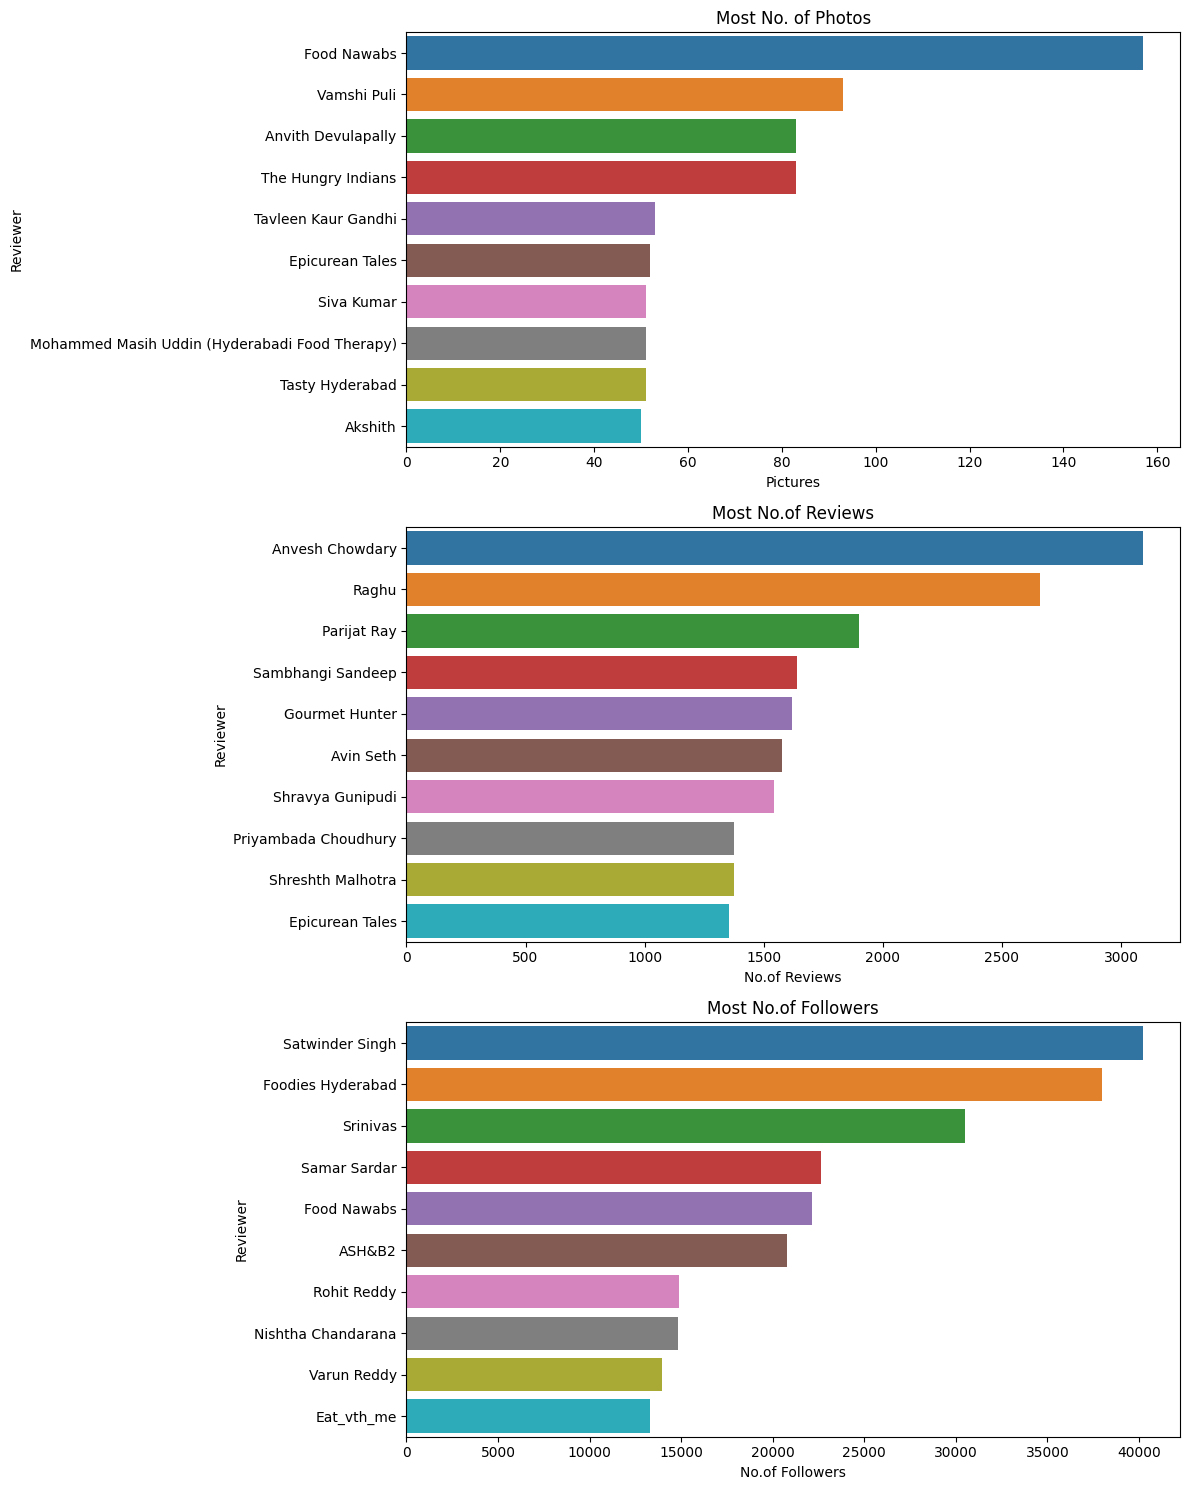

In [62]:
plt.figure(figsize = (12,15))
plt.subplot(3,1,1)
sns.barplot(data = reviewer.sort_values('Pictures',ascending = False)[:10],y = 'Reviewer',x = 'Pictures')
plt.title('Most No. of Photos')
plt.subplot(3,1,2)
sns.barplot(data = reviewer.sort_values('No.of Reviews',ascending = False)[:10],y = 'Reviewer',x = 'No.of Reviews')
plt.title('Most No.of Reviews')
plt.subplot(3,1,3)
sns.barplot(data = reviewer.sort_values('No.of Followers',ascending = False)[:10],y = 'Reviewer',x = 'No.of Followers')
plt.title('Most No.of Followers')
plt.tight_layout()
plt.show()

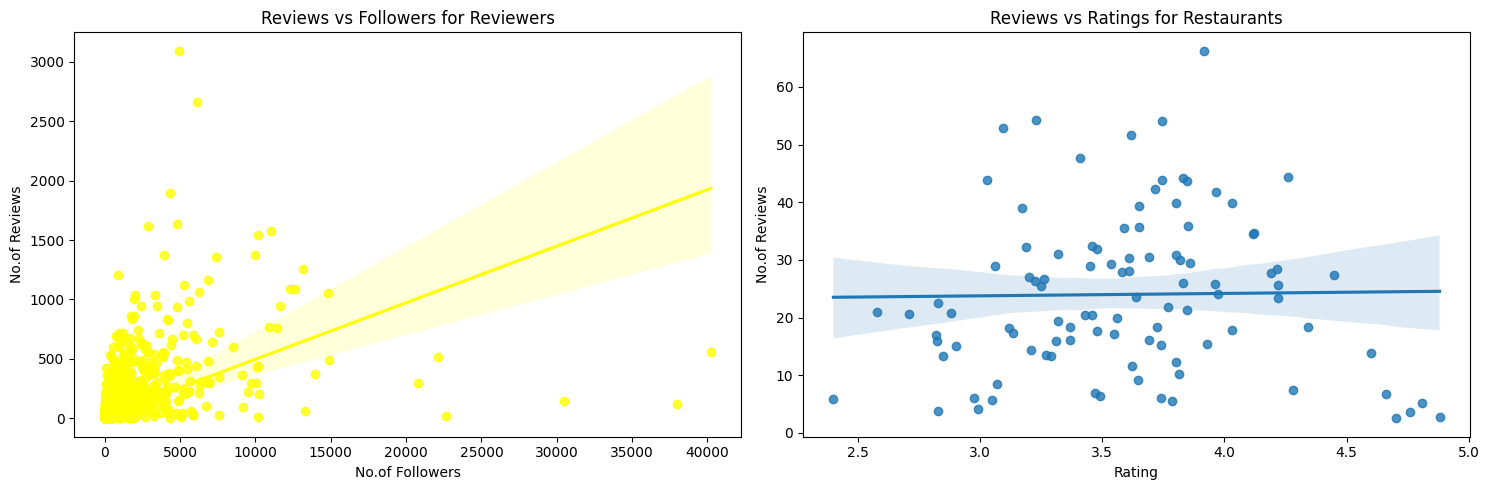

In [63]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.regplot(data = reviewer,x = 'No.of Followers',y = 'No.of Reviews',color = 'yellow')
# sns.scatterplot(data = reviewer,x = 'No.of Followers',y = 'Pictures',color = 'green')
plt.title('Reviews vs Followers for Reviewers')
plt.subplot(1,2,2)
sns.regplot(data = res,x = 'Rating',y = 'No.of Reviews')
plt.title('Reviews vs Ratings for Restaurants')
plt.tight_layout()
plt.show()

In [64]:
df2.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No.of Reviews,No.of Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3.0,2.0


In [65]:
df = df2[['Review','Rating']].copy()
df.head()

,Review,Rating
0,"The ambience was good, food was quite good . h...",5.0
1,Ambience is too good for a pleasant evening. S...,5.0
2,A must try.. great food great ambience. Thnx f...,5.0
3,Soumen das and Arun was a great guy. Only beca...,5.0
4,Food is good.we ordered Kodi drumsticks and ba...,5.0


In [66]:
labels = ['One Time','Any Time','Great Time']
df['Rating_grp'] = pd.cut(df['Rating'],bins = 3,labels = labels)
df.drop('Rating',axis = 1,inplace = True)
df.head()

,Review,Rating_grp
0,"The ambience was good, food was quite good . h...",Great Time
1,Ambience is too good for a pleasant evening. S...,Great Time
2,A must try.. great food great ambience. Thnx f...,Great Time
3,Soumen das and Arun was a great guy. Only beca...,Great Time
4,Food is good.we ordered Kodi drumsticks and ba...,Great Time


In [67]:
df['Rating_grp'].value_counts()

Great Time    6268
One Time      2428
Any Time      1258
Name: Rating_grp, dtype: int64

In [68]:
df['Review'] = df['Review'].str.lower()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9954 entries, 0 to 9953
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Review      9954 non-null   object  
 1   Rating_grp  9954 non-null   category
dtypes: category(1), object(1)
memory usage: 87.7+ KB


In [70]:
df[df['Review'] == ' '].head()

,Review,Rating_grp


In [71]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [72]:
import string
from nltk.corpus import stopwords

### Function to remove both Stopwords and Punctuations

In [73]:
def text(msg):
  no_punc = [char for char in msg if char not in string.punctuation]
  no_punc = ''.join(no_punc)
  return ' '.join([word for word in no_punc.split() if word.lower not in stopwords.words('english')])

In [74]:
df['token_review'] = df['Review'].apply(text)
pd.set_option('display.max_colwidth',-1)
df.head()

,Review,Rating_grp,token_review
0,"the ambience was good, food was quite good . had saturday lunch , which was cost effective .\ngood place for a sate brunch. one can also chill with friends and or parents.\nwaiter soumen das was really courteous and helpful.",Great Time,the ambience was good food was quite good had saturday lunch which was cost effective good place for a sate brunch one can also chill with friends and or parents waiter soumen das was really courteous and helpful
1,ambience is too good for a pleasant evening. service is very prompt. food is good. over all a good experience. soumen das - kudos to the service,Great Time,ambience is too good for a pleasant evening service is very prompt food is good over all a good experience soumen das kudos to the service
2,a must try.. great food great ambience. thnx for the service by pradeep and subroto. my personal recommendation is penne alfredo pasta:) ....... also the music in the background is amazing.,Great Time,a must try great food great ambience thnx for the service by pradeep and subroto my personal recommendation is penne alfredo pasta also the music in the background is amazing
3,"soumen das and arun was a great guy. only because of their behavior and sincerety, and good food off course, i would like to visit this place again.",Great Time,soumen das and arun was a great guy only because of their behavior and sincerety and good food off course i would like to visit this place again
4,food is good.we ordered kodi drumsticks and basket mutton biryani. all are good. thanks to pradeep. he served well. we enjoyed here. ambience is also very good.,Great Time,food is goodwe ordered kodi drumsticks and basket mutton biryani all are good thanks to pradeep he served well we enjoyed here ambience is also very good


### Training Model

In [75]:
from sklearn.model_selection import train_test_split
rw_tr,rw_tt,rt_tr,rt_tt = train_test_split(df['token_review'],df['Rating_grp'],random_state = 0,test_size = 0.3)
rw_tr.shape,rw_tt.shape

((6967,), (2987,))

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()
clf = LogisticRegression(solver = 'lbfgs')

In [90]:
from sklearn.pipeline import Pipeline
model = Pipeline([('Vectorizer',tvec),('Classifier',clf)])
model.fit(rw_tr,rt_tr)

Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('Classifier', LogisticRegression())])

### Evaluating Trained Model

In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [81]:
tr_pred = model.predict(rw_tr)
# Confusion Matrix
print(confusion_matrix(rt_tr,tr_pred))

[[ 368  354  149]
 [  24 4349   46]
 [  26   85 1566]]


In [83]:
print('Accuracy:',accuracy_score(tr_pred,rt_tr))
print('Precision:',precision_score(tr_pred,rt_tr,average = 'weighted'))
print('Recall_score:',recall_score(tr_pred,rt_tr,average = 'weighted'))

Accuracy: 0.9018228792880724
Precision: 0.9377351883848776
Recall_score: 0.9018228792880724


### Predicting on Test set

In [84]:
pred = model.predict(rw_tt)
# Confusion Matrix
print(confusion_matrix(rt_tt,pred))

[[  75  235   77]
 [  35 1786   28]
 [  26   84  641]]


In [85]:
print('Accuracy:',accuracy_score(pred,rt_tt))
print('Precision:',precision_score(pred,rt_tt,average = 'weighted'))
print('Recall_score:',recall_score(pred,rt_tt,average = 'weighted'))

Accuracy: 0.8376297288249079
Precision: 0.9027004999242062
Recall_score: 0.8376297288249079


### Making Predictions on some random examples

In [91]:
example = ['food was bad but ambience was good']
print(model.predict(example))

['Any Time']


In [92]:
example = ['Food was mind blowing plus the ambience is attractive']
print(model.predict(example))

['Great Time']


In [93]:
example = ['food was bad but ambience was poor']
print(model.predict(example))

['One Time']
